In [1]:
import os 

import numpy as np
import pandas as pd

In [2]:
dijkstra_dir = "/Users/daddy30000/dev/data/BEAM/NERSC/dijkstra/all"
fastar_dir = "/Users/daddy30000/dev/data/BEAM/NERSC/fasl/all"

In [3]:
dir = dijkstra_dir
preamble = "estim_v_actual_routes_"
files = [n for n in os.listdir(dir) if preamble in n]
files.sort(key=lambda x: int(x.replace(preamble,"").split('.')[0]))

In [4]:
def get_measures(dir):
    """
    :param dir: (str) path to directory
    :returns: (pd.DataFrame) Ten metrics calculated for differences in time and distance: total percent, mean, median, 
    min and max.
    """
    o_dir = os.getcwd()
    os.chdir(dir)
    preamble = "estim_v_actual_routes_"  
    files = [n for n in os.listdir(dir) if preamble in n]
    files.sort(key=lambda x: int(x.replace(preamble,"").split('.')[0]))  # Sort by ascending iteration number
    out = []
    for f in files:
        df = pd.read_csv(f, index_col='Id')
        ##
        # Calculations
        ## 
        # Time Totals
        total_time_actual = df.actualTravelTime.sum()
        total_time_estim = df.estimTravelTime.sum()
        total_time_diff_fract = np.true_divide(total_time_estim - total_time_actual, total_time_actual)
        # Dist totals
        total_dist_actual = df.actualDistance.sum()
        total_dist_estim = df.estimDistance.sum()
        total_dist_diff_fract = np.true_divide(total_dist_estim - total_dist_actual, total_dist_actual)
        # Temp dfs
        time_temp = df.estimTravelTime.subtract(df.actualTravelTime).divide(df.actualTravelTime).replace([np.inf, -np.inf], np.nan).dropna()
        dist_temp = df.estimDistance.subtract(df.actualDistance).divide(df.actualDistance).replace([np.inf, -np.inf], np.nan).dropna()
        # Mean time
        mean_time_diff = time_temp.mean()
        # Mean dist
        mean_dist_diff = dist_temp.mean()
        # Median time
        median_time_diff = time_temp.median()
        # Median dist
        median_dist_diff = dist_temp.median()
        # Min time
        min_time_diff = time_temp.min()
        # Min dist
        min_dist_diff = dist_temp.min()
        # max time
        max_time_diff = time_temp.max()
        # max dist
        max_dist_diff = dist_temp.max()
        
        ##
        # Output df
        ##
        out_dict = {'total_diff': [total_time_diff_fract, total_dist_diff_fract],
                    'mean': [mean_time_diff, mean_dist_diff],
                    'median': [median_time_diff, median_dist_diff],
                    'min': [min_time_diff, min_dist_diff],
                    'max': [max_time_diff, max_dist_diff]}
        out_df = pd.DataFrame.from_dict(data=out_dict, orient='index')
        out_df.columns = ['Time', 'Distance']
        out.append(out_df)
    os.chdir(o_dir)
    return out
        

In [5]:
# def get_measures(dir):
#     """
#     :param dir: (str) path to directory
#     :returns: (pd.DataFrame) Ten metrics calculated for differences in time and distance: total percent, mean, median, 
#     min and max.
#     """
#     o_dir = os.getcwd()
#     os.chdir(dir)
#     preamble = "estim_v_actual_routes_"  
#     files = [n for n in os.listdir(dir) if preamble in n]
#     files.sort(key=lambda x: int(x.replace(preamble,"").split('.')[0]))  # Sort by ascending iteration number
#     out = []
#     for f in files:
#         df = pd.read_csv(f, index_col='Id')
#         ##
#         # Calculations
#         ## 
#         # Time Totals
#         total_time_actual = df.actualTravelTime.sum()
#         total_time_estim = df.estimTravelTime.sum()
#         total_time_diff_fract = np.true_divide(total_time_estim - total_time_actual, total_time_actual)
#         # Dist totals
#         total_dist_actual = df.actualDistance.sum()
#         total_dist_estim = df.estimDistance.sum()
#         total_dist_diff_fract = np.true_divide(total_dist_estim - total_dist_actual, total_dist_actual)
#         # Mean time
#         mean_time_diff = df.estimTravelTime.subtract(df.actualTravelTime).divide(df.actualTravelTime).mean()
#         # Mean dist
#         mean_dist_diff = df.estimDistance.subtract(df.actualDistance).divide(df.actualDistance).mean()
#         # Median time
#         median_time_diff = df.estimTravelTime.subtract(df.actualTravelTime).divide(df.actualTravelTime).median()
#         # Median dist
#         median_dist_diff = df.estimDistance.subtract(df.actualDistance).divide(df.actualDistance).median()
#         # Min time
#         min_time_diff = df.estimTravelTime.subtract(df.actualTravelTime).divide(df.actualTravelTime).min()
#         # Min dist
#         min_dist_diff = df.estimDistance.subtract(df.actualDistance).divide(df.actualDistance).min()
#         # max time
#         max_time_diff = df.estimTravelTime.subtract(df.actualTravelTime).divide(df.actualTravelTime).max()
#         # max dist
#         max_dist_diff = df.estimDistance.subtract(df.actualDistance).divide(df.actualDistance).max()
        
#         ##
#         # Output df
#         ##
#         out_dict = {'total_diff': [total_time_diff_fract, total_dist_diff_fract],
#                     'mean': [mean_time_diff, mean_dist_diff],
#                     'median': [median_time_diff, median_dist_diff],
#                     'min': [min_time_diff, min_dist_diff],
#                     'max': [max_time_diff, max_dist_diff]}
#         out_df = pd.DataFrame.from_dict(data=out_dict, orient='index')
#         out_df.columns = ['Time', 'Distance']
#         out.append(out_df)
#     os.chdir(o_dir)
#     return out
        

In [6]:
dijk_results = get_measures(dijkstra_dir)
fasl_results = get_measures(fastar_dir)

In [7]:
dijk_ = pd.concat(dijk_results, axis=1)
fasl_ = pd.concat(fasl_results, axis=1)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

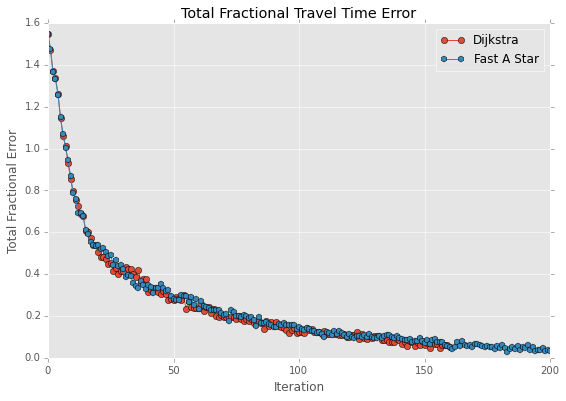

In [9]:
fig = plt.figure(figsize=(9,6))
plt.plot(np.arange(dijk_.shape[1]/2), dijk_['Time'].loc['total_diff'], marker='o')
plt.plot(np.arange(fasl_.shape[1]/2), fasl_['Time'].loc['total_diff'], marker='h')
plt.xlabel('Iteration')
plt.ylabel('Total Fractional Error')
plt.title('Total Fractional Travel Time Error')
plt.legend(['Dijkstra', 'Fast A Star'])

In [10]:
print "FASL: %f" % fasl_['Time'].loc['total_diff'][-1]
print "Dijkstra: %f" % dijk_['Time'].loc['total_diff'][-1]

FASL: 0.032809
Dijkstra: 0.049775


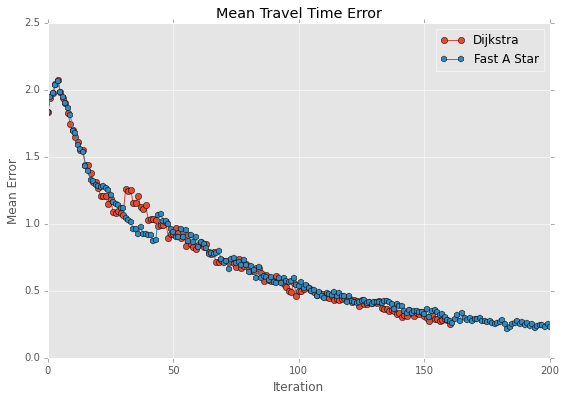

In [11]:
fig = plt.figure(figsize=(9,6))
plt.plot(np.arange(dijk_.shape[1]/2), dijk_['Time'].loc['mean'], marker='o')
plt.plot(np.arange(fasl_.shape[1]/2), fasl_['Time'].loc['mean'], marker='h')
plt.xlabel('Iteration')
plt.ylabel('Mean Error')
plt.title('Mean Travel Time Error')
plt.legend(['Dijkstra', 'Fast A Star'])

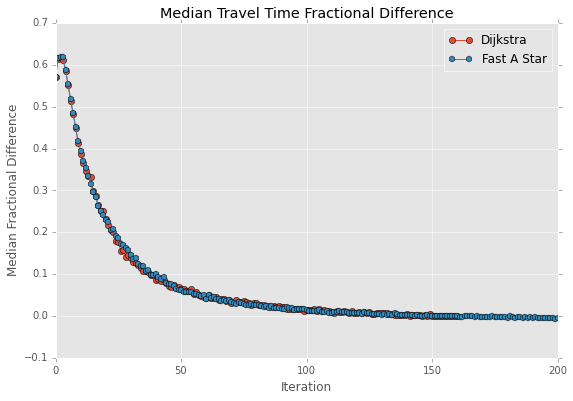

In [12]:
fig = plt.figure(figsize=(9,6))
plt.plot(np.arange(dijk_.shape[1]/2), dijk_['Time'].loc['median'], marker='o')
plt.plot(np.arange(fasl_.shape[1]/2), fasl_['Time'].loc['median'], marker='h')
plt.xlabel('Iteration')
plt.ylabel('Median Fractional Difference')
plt.title('Median Travel Time Fractional Difference')
plt.legend(['Dijkstra', 'Fast A Star'])    

### fig = plt.figure(figsize=(9,6))
plt.plot(np.arange(dijk_.shape[1]/2), dijk_['Distance'].loc['mean'], marker='o')
plt.plot(np.arange(fasl_.shape[1]/2), fasl_['Distance'].loc['mean'], marker='h')
plt.xlabel('Iteration')
plt.ylabel('Mean Error')
plt.title('Mean Distance Error')
plt.legend(['Dijkstra', 'Fast A Star'])

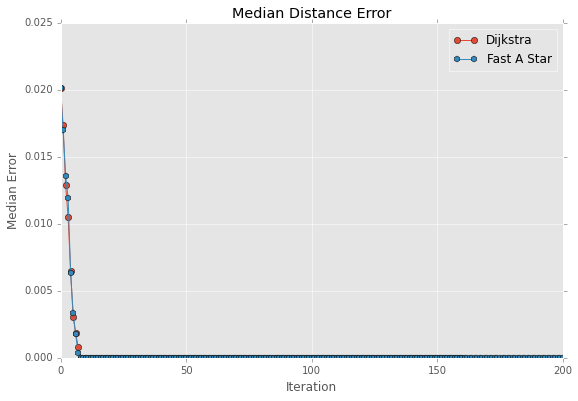

In [13]:
fig = plt.figure(figsize=(9,6))
plt.plot(np.arange(dijk_.shape[1]/2), dijk_['Distance'].loc['median'], marker='o')
plt.plot(np.arange(fasl_.shape[1]/2), fasl_['Distance'].loc['median'], marker='h')
plt.xlabel('Iteration')
plt.ylabel('Median Error')
plt.title('Median Distance Error')
plt.legend(['Dijkstra', 'Fast A Star'])